In [1]:
library(cluster)
library(classInt)
library(RColorBrewer)
library(grid)
library(rgdal)
library(ggplot2)
library(gridExtra)
library(raster)
library(lattice)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
out <- '/Users/dongmeichen/Documents/beetle/images/DEA/'

In [3]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA))
results <- read.csv(sprintf('%s/gwr_results_wo_FIA_3.csv', DATA))
head(data)
head(results)

beetleAcres lon       lat        etopo1    mStdAge    density   mfri     
1 0.9889048   -1.688095 -0.8165767 -2.085849 -1.3350325 1.5805318 -1.272927
2 0.9889048   -1.673234 -0.7636426 -1.898007 -1.0126988 1.2731710 -1.272927
3 0.9889048   -1.647397 -0.8096216 -1.906174  1.4076788 1.3656373 -1.272927
4 0.9889048   -1.650107 -0.7848950 -2.107116  2.9144370 0.9328562 -1.272927
5 1.0377935   -1.709590 -0.2661335 -2.053066  0.1262329 1.1768966 -1.272927
6 1.3365791   -1.712549 -0.2414535 -2.020680 -0.2400199 1.3839081 -1.272927
  prs       GAP1       GAP3      ⋯ maxT_sq     Pmean_sq summerP1_sq JanMin_sq
1 -1.181455 -0.4134775 -1.336267 ⋯  0.03995964 2.816120 -1.1203220  -1.727787
2 -1.181455 -0.4134775 -1.336267 ⋯ -0.20536989 2.307652 -1.1154629  -1.730798
3 -1.181455 -0.4134775 -1.336267 ⋯  0.58251620 2.113863 -1.1282896  -1.729906
4 -1.181455 -0.4134775 -1.336267 ⋯  0.34984724 1.944094 -1.1328530  -1.730057
5 -1.181455 -0.4134775 -1.336267 ⋯ -0.75895721 2.692757 -0.7774133  -1.730436
6 -1.181455 -0.4134775 -1.336267 ⋯ -0.78162325 2.735168 -0.7519392  -1.730789
  Jan20_sq   PcumOctSep_sq Tmean_exp   TMarAug_exp fallTmean_exp Mar20_logp1
1 -0.5901567 2.863514      -0.05063177 -0.09477036 -0.03941164   -0.7538392 
2 -0.5901567 2.342172      -0.02689908 -0.09232931 -0.01876778   -0.7538392 
3 -0.5901567 2.152967       0.04220516 -0.08405338  0.04636415   -0.7538392 
4 -0.5901567 1.979607       0.20567735 -0.06813269  0.20040765   -0.7538392 
5 -0.5901567 2.710080      -0.02737714 -0.09138732 -0.02090733   -0.7538392 
6 -0.5901567 2.752733      -0.06793202 -0.09495603 -0.06064562   -0.7538392

sum.w    X.Intercept. lon        lat        etopo1     mStdAge      density  
1 179.3810 -1.017168    -0.6055033  -9.838155 0.11905925  0.008547944 0.1583677
2 178.7698 -2.907322    -0.6432976  -6.999490 0.11413818  0.010784771 0.1740326
3 157.6484 -8.041061    -0.7054683 -10.444173 0.12798179  0.012261506 0.1413896
4 162.9387 -7.091694    -0.6909941  -8.699616 0.12265347  0.012943010 0.1561343
5 156.2273 18.722676    -0.1417880  -1.119855 0.06994264 -0.010694046 0.2290474
6 154.1046 19.067246    -0.1090428  -1.663079 0.06771593 -0.009297842 0.2208408
  prs         GAP1          GAP3        ⋯ JanMin_sq_se_EDF Jan20_sq_se_EDF
1  0.10303851  3.210220e-04 0.006868212 ⋯ 0.1526610         9.735488      
2  0.10491276  3.787596e-05 0.006320557 ⋯ 0.1674734        19.737043      
3  0.12353411  2.166656e-03 0.005489688 ⋯ 0.1930515        31.354878      
4  0.11921799  1.470433e-03 0.005516344 ⋯ 0.1912556        32.546671      
5 -0.03344621 -4.503717e-03 0.006724458 ⋯ 0.2805055        10.345669      
6 -0.03855342 -4.410923e-03 0.006511328 ⋯ 0.2856332         9.989490      
  PcumOctSep_sq_se_EDF Tmean_exp_se_EDF TMarAug_exp_se_EDF fallTmean_exp_se_EDF
1  4.195429            0.08304107       0.04493670         0.04764743          
2  4.622906            0.10002240       0.05256967         0.05904684          
3  5.327489            0.10803372       0.05696265         0.06386767          
4  5.262170            0.11261151       0.05857010         0.06730571          
5 11.912793            0.60872254       0.19621509         0.67363433          
6 12.432254            0.63114782       0.19829219         0.72583704          
  Mar20_logp1_se_EDF pred.se.1  coord.x coord.y
1  1.767566          0.05242630 -990000 -460000
2  4.588766          0.03709929 -980000 -440000
3  6.580805          0.03468166 -970000 -460000
4  7.290535          0.04206069 -970000 -450000
5 19.898375          0.03621172 -970000 -240000
6 19.804894          0.03705124 -970000 -230000

In [4]:
names(results)

[1] "sum.w"                "X.Intercept."         "lon"                 
  [4] "lat"                  "etopo1"               "mStdAge"             
  [7] "density"              "prs"                  "GAP1"                
 [10] "GAP3"                 "vpd"                  "summerP0"            
 [13] "Tmean"                "mi"                   "Tvar"                
 [16] "wd"                   "AugTmean"             "OctTmin"             
 [19] "AugMaxT"              "AugTmax"              "Acs"                 
 [22] "MarMin"               "PPT"                  "summerP2"            
 [25] "TMarAug"              "Mar20"                "fallTmean"           
 [28] "MarTmin"              "Tmin"                 "winterMin"           
 [31] "summerTmean"          "Pmean"                "minT"                
 [34] "TOctSep"              "Jan20"                "PcumOctSep"          
 [37] "lat_sq"               "density_sq"           "mStdAge_sq"          
 [40] "prs_sq"               "vpd_sq"               "cwd_sq"              
 [43] "maxAugT_sq"           "summerP0_sq"          "Tmean_sq"            
 [46] "mi_sq"                "Tvar_sq"              "wd_sq"               
 [49] "OctTmin_sq"           "AugMaxT_sq"           "Acs_sq"              
 [52] "ddAugJul_sq"          "summerP2_sq"          "maxT_sq"             
 [55] "Pmean_sq"             "summerP1_sq"          "JanMin_sq"           
 [58] "Jan20_sq"             "PcumOctSep_sq"        "Tmean_exp"           
 [61] "TMarAug_exp"          "fallTmean_exp"        "Mar20_logp1"         
 [64] "X.Intercept._se"      "lon_se"               "lat_se"              
 [67] "etopo1_se"            "mStdAge_se"           "density_se"          
 [70] "prs_se"               "GAP1_se"              "GAP3_se"             
 [73] "vpd_se"               "summerP0_se"          "Tmean_se"            
 [76] "mi_se"                "Tvar_se"              "wd_se"               
 [79] "AugTmean_se"          "OctTmin_se"           "AugMaxT_se"          
 [82] "AugTmax_se"           "Acs_se"               "MarMin_se"           
 [85] "PPT_se"               "summerP2_se"          "TMarAug_se"          
 [88] "Mar20_se"             "fallTmean_se"         "MarTmin_se"          
 [91] "Tmin_se"              "winterMin_se"         "summerTmean_se"      
 [94] "Pmean_se"             "minT_se"              "TOctSep_se"          
 [97] "Jan20_se"             "PcumOctSep_se"        "lat_sq_se"           
[100] "density_sq_se"        "mStdAge_sq_se"        "prs_sq_se"           
[103] "vpd_sq_se"            "cwd_sq_se"            "maxAugT_sq_se"       
[106] "summerP0_sq_se"       "Tmean_sq_se"          "mi_sq_se"            
[109] "Tvar_sq_se"           "wd_sq_se"             "OctTmin_sq_se"       
[112] "AugMaxT_sq_se"        "Acs_sq_se"            "ddAugJul_sq_se"      
[115] "summerP2_sq_se"       "maxT_sq_se"           "Pmean_sq_se"         
[118] "summerP1_sq_se"       "JanMin_sq_se"         "Jan20_sq_se"         
[121] "PcumOctSep_sq_se"     "Tmean_exp_se"         "TMarAug_exp_se"      
[124] "fallTmean_exp_se"     "Mar20_logp1_se"       "gwr.e"               
[127] "pred"                 "pred.se"              "localR2"             
[130] "X.Intercept._se_EDF"  "lon_se_EDF"           "lat_se_EDF"          
[133] "etopo1_se_EDF"        "mStdAge_se_EDF"       "density_se_EDF"      
[136] "prs_se_EDF"           "GAP1_se_EDF"          "GAP3_se_EDF"         
[139] "vpd_se_EDF"           "summerP0_se_EDF"      "Tmean_se_EDF"        
[142] "mi_se_EDF"            "Tvar_se_EDF"          "wd_se_EDF"           
[145] "AugTmean_se_EDF"      "OctTmin_se_EDF"       "AugMaxT_se_EDF"      
[148] "AugTmax_se_EDF"       "Acs_se_EDF"           "MarMin_se_EDF"       
[151] "PPT_se_EDF"           "summerP2_se_EDF"      "TMarAug_se_EDF"      
[154] "Mar20_se_EDF"         "fallTmean_se_EDF"     "MarTmin_se_EDF"      
[157] "Tmin_se_EDF"          "winterMin_se_EDF"     "summerTmean_se_EDF"  
[160] "Pmean_se_EDF"       

In [6]:
n <- dim(results)[1]
np <- length(which(names(results)=='lon'):which(names(results)=='Mar20_logp1'))
ntests <- n * np

In [7]:
coeffs <- results[, colnames(results)[colnames(results) %in% colnames(data)]]

In [8]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

In [9]:
selected <- c('etopo1', 'density', 'Tmean', 'PPT')

In [10]:
coeffs <- coeffs[, selected]
coef.vars <- colnames(coeffs)

In [11]:
head(coeffs)

etopo1     density   Tmean      PPT      
1 0.11905925 0.1583677 -105.74685 -2.586076
2 0.11413818 0.1740326 -113.15640 -3.307433
3 0.12798179 0.1413896 -125.20755 -2.728679
4 0.12265347 0.1561343 -124.32030 -3.098765
5 0.06994264 0.2290474  -91.40792 -1.116709
6 0.06771593 0.2208408  -89.38964 -0.933537

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 381800)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 381800)”

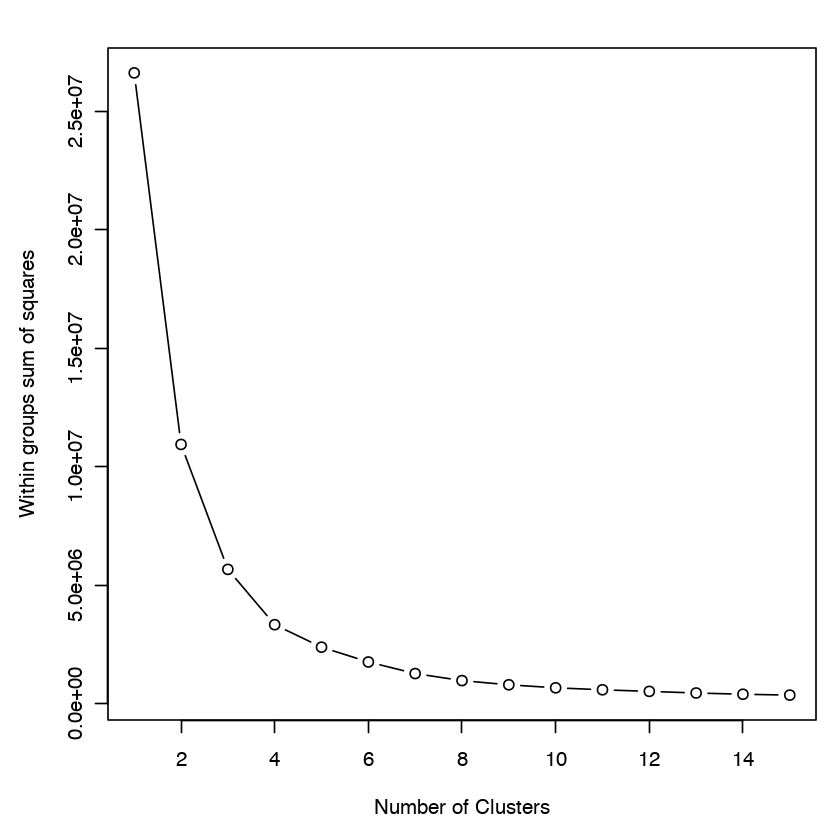

In [12]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

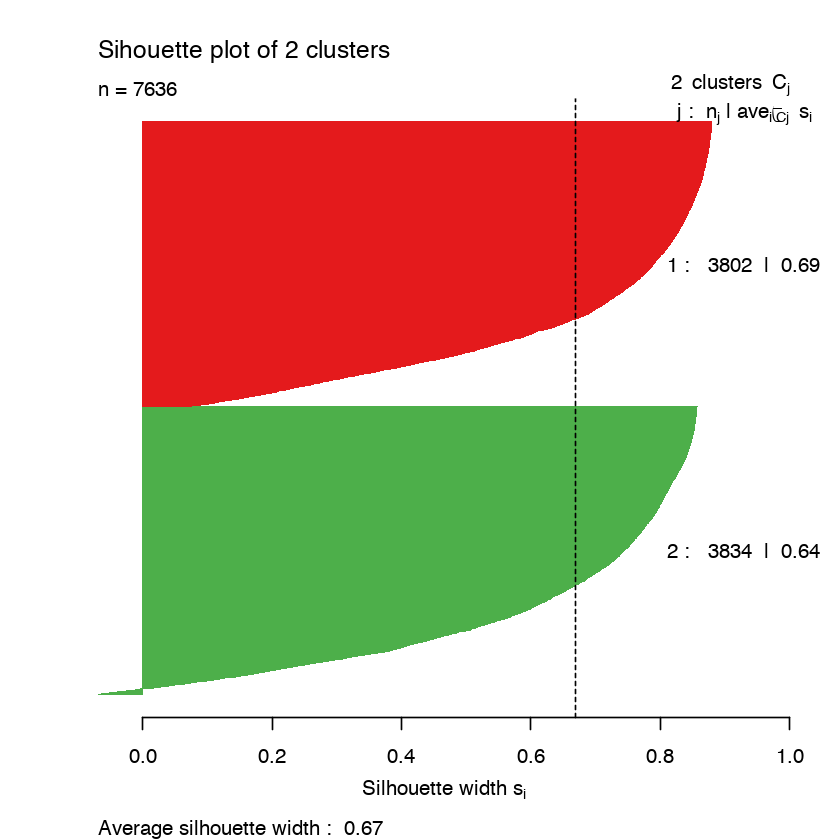

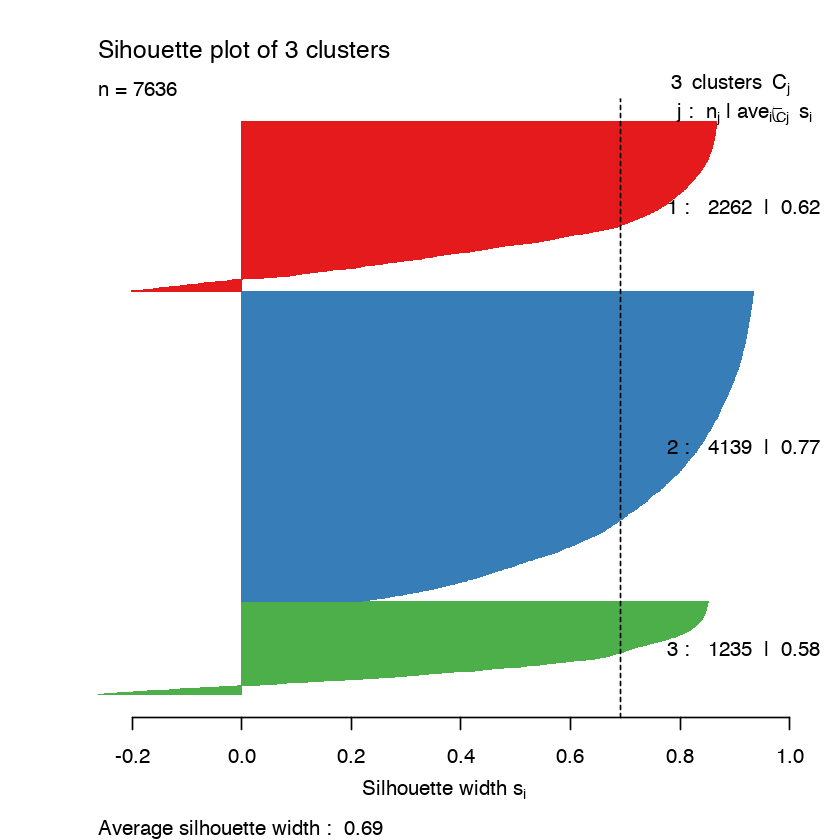

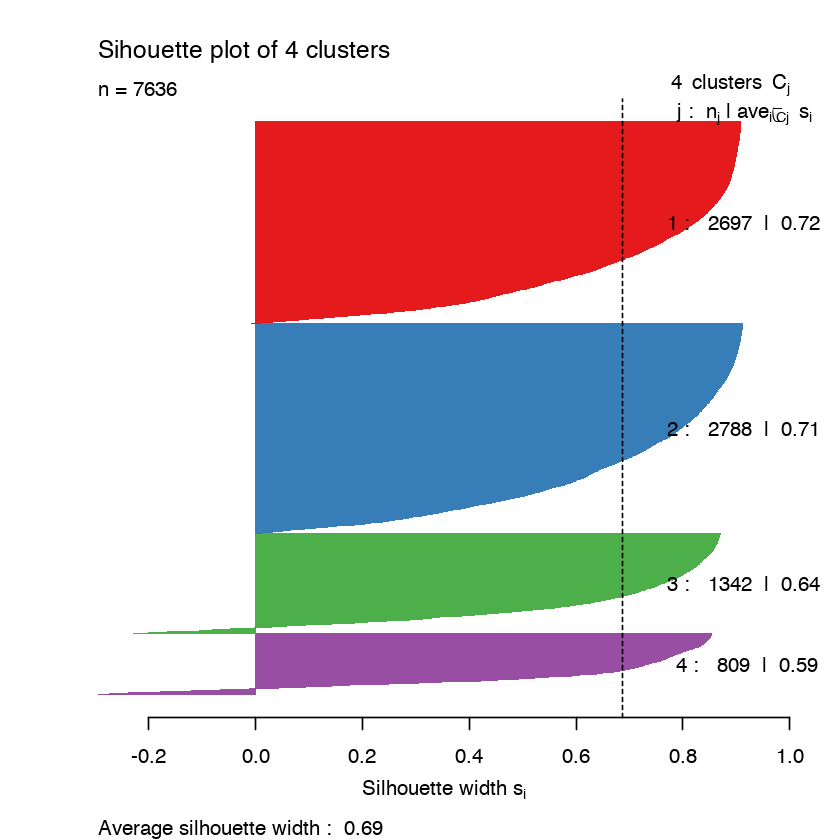

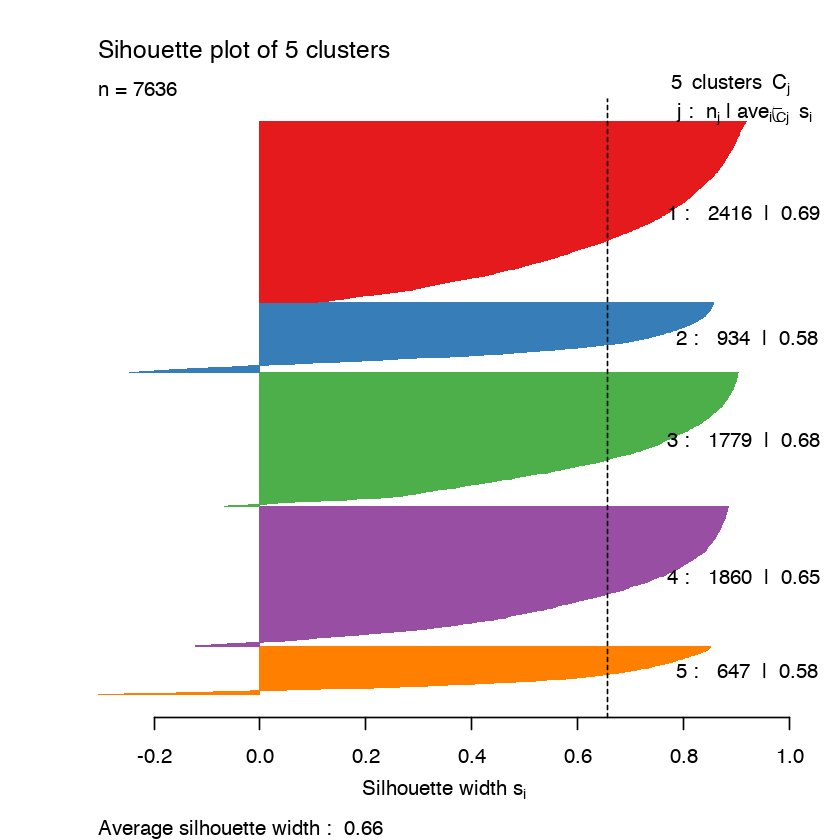

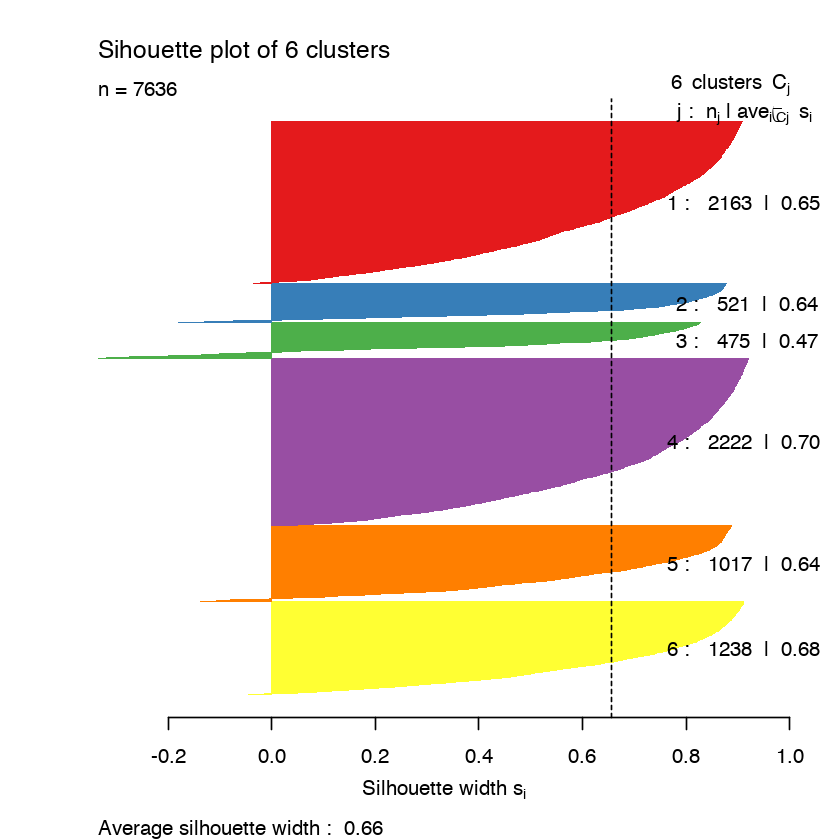

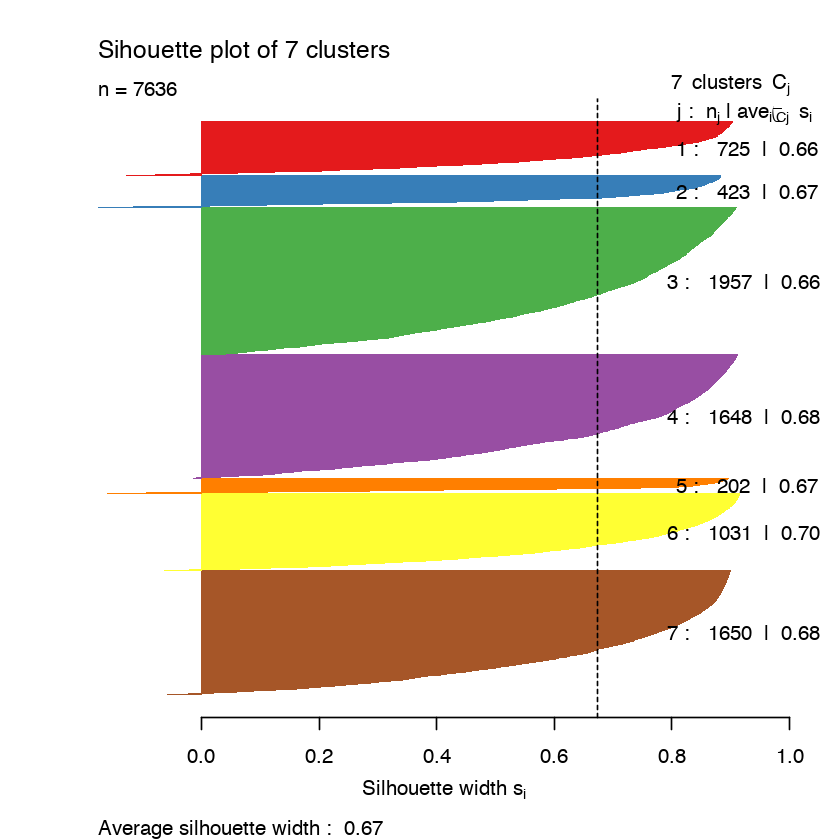

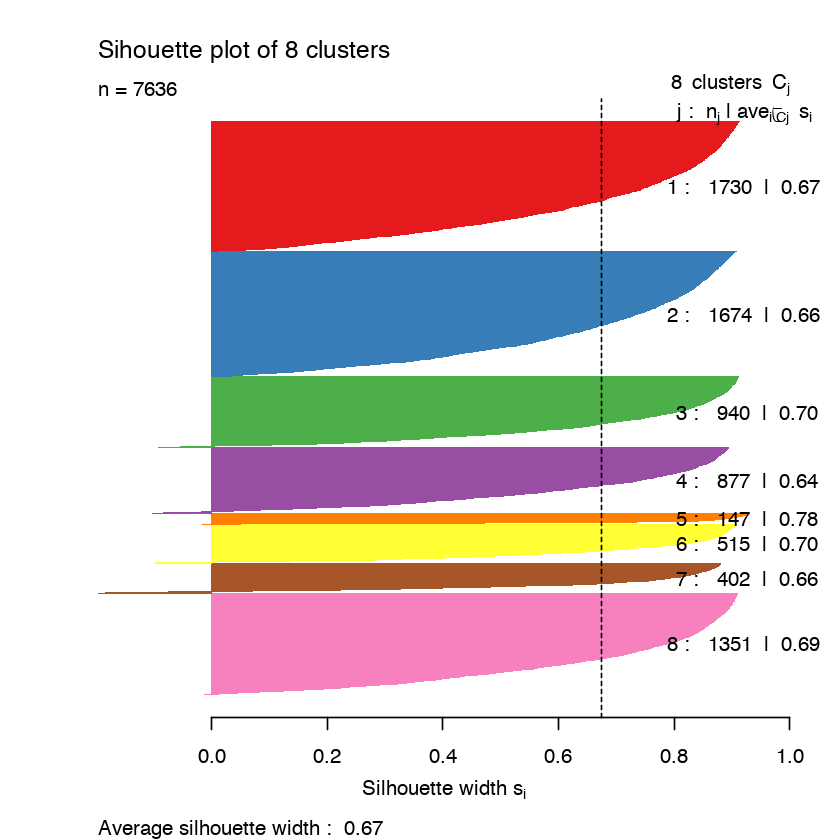

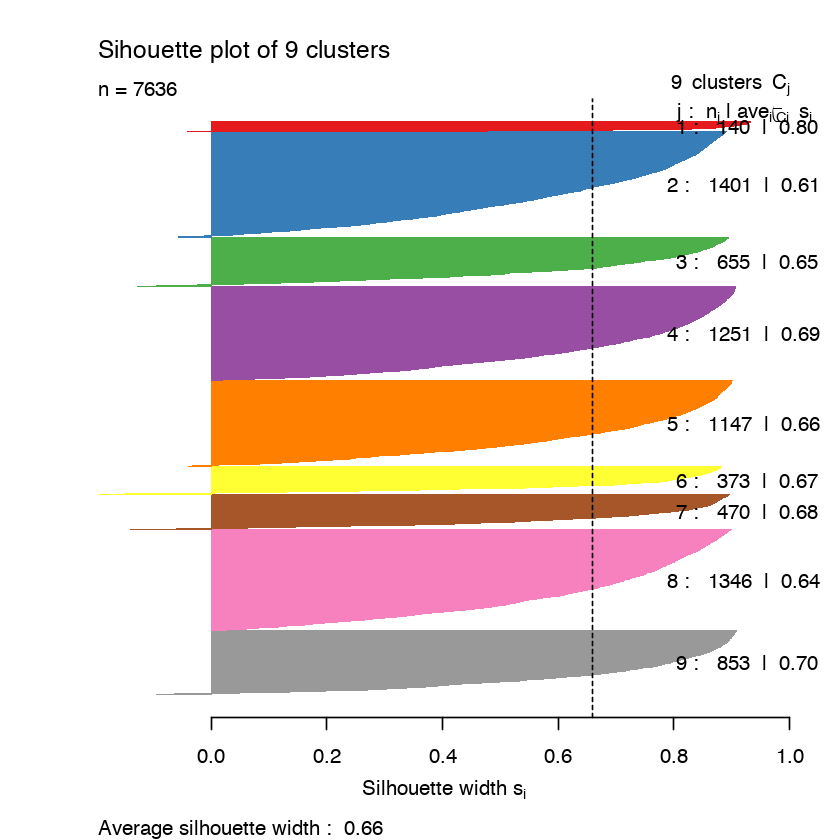

In [13]:
w <- vector()
par(mfrow=c(1,1))
for(ncluster in 2:9){
    nclr <- ncluster
    if(nclr > 2){
        plotclr <- brewer.pal(nclr,"Set1") 
    }else{
        plotclr <- c("#E41A1C", "#4DAF4A")
    }
    fit <- kmeans(coeffs, ncluster)
    dis <- dist(coeffs)^2
    sil <- silhouette(fit$cluster, dis)
    plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
    abline(v=mean(sil[,3]), lty=2)
    w[ncluster] <- mean(sil[,3])
}

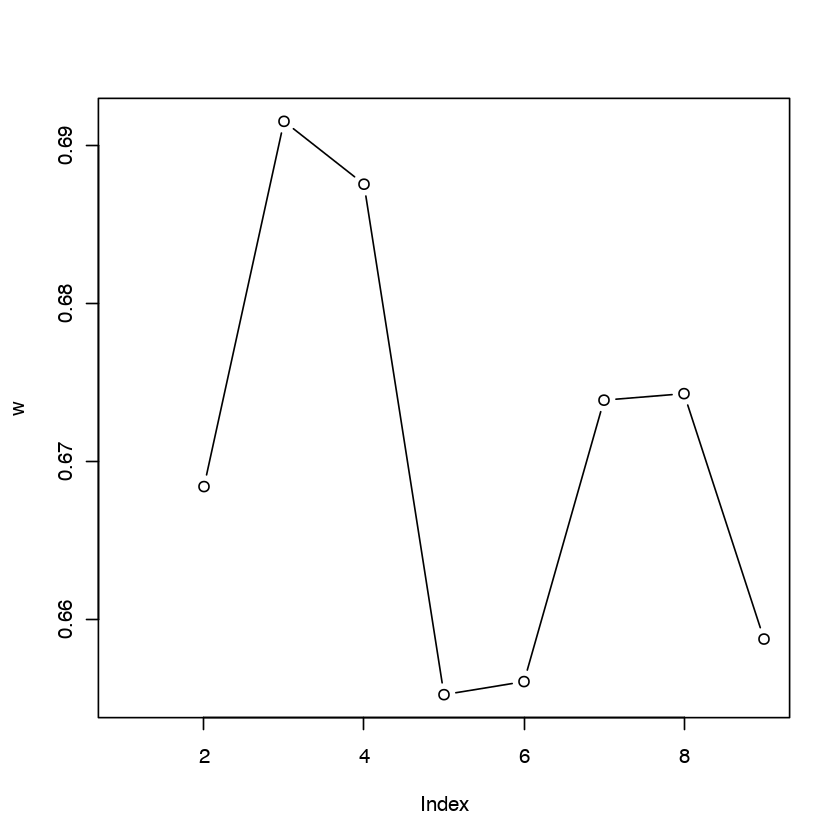

In [14]:
plot(w, type='b')

In [15]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [16]:
data.gwr <- cbind(data, xy)

In [17]:
ncluster <- 4
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}

In [18]:
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)

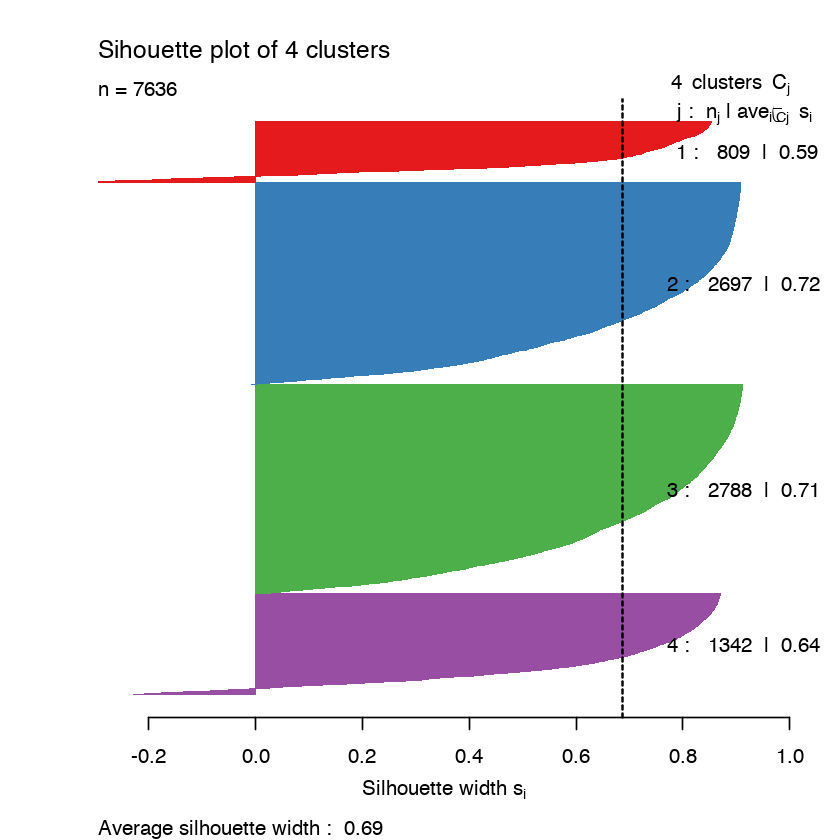

In [19]:
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2, lwd=1.5)

In [20]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

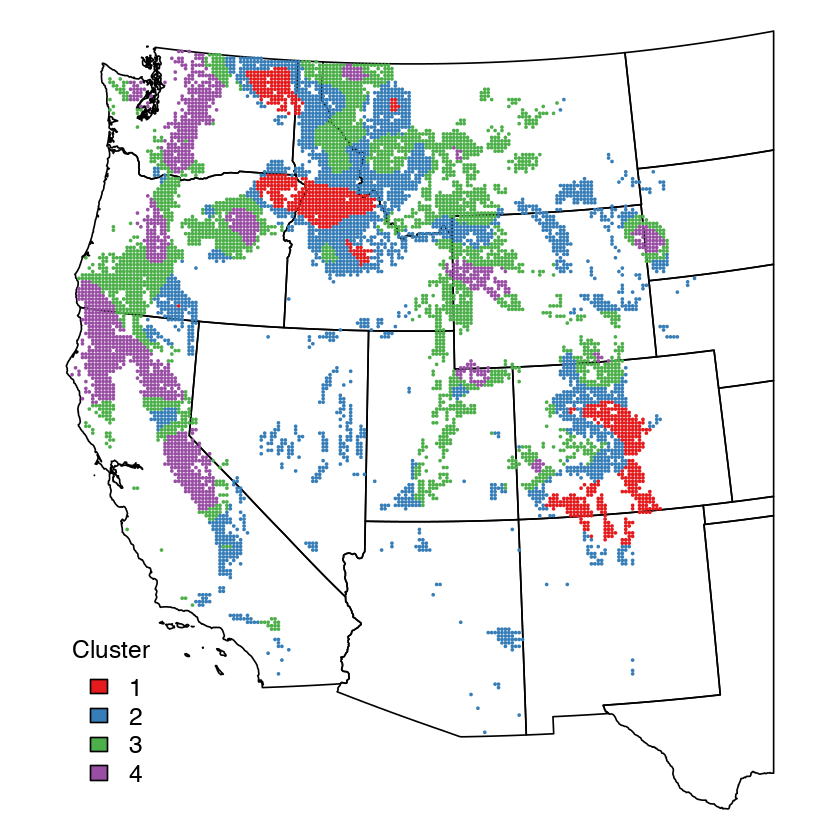

In [21]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend(-1000000, -1200000, legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=1.2, bty="n")

In [22]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

In [23]:
titles <- c('Elevation', 'Tree density', 'MPB life cycle mean temprature', 'Cumulative precipitation')

In [24]:
coef.vars

[1] "etopo1"  "density" "Tmean"   "PPT"

In [25]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,2),rep(2,2)); n2 <- rep(c(1,2),2) 
png(paste0(out,"boxplot_clusters_scaled.png"), width=8, height=8, units="in", res=300)
grid.newpage()
pushViewport(viewport(layout = grid.layout(2, 2)))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_bw()+theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 
    print(g, vp = vplayout(n1[i], n2[i]))
}
dev.off()

pdf 
  2

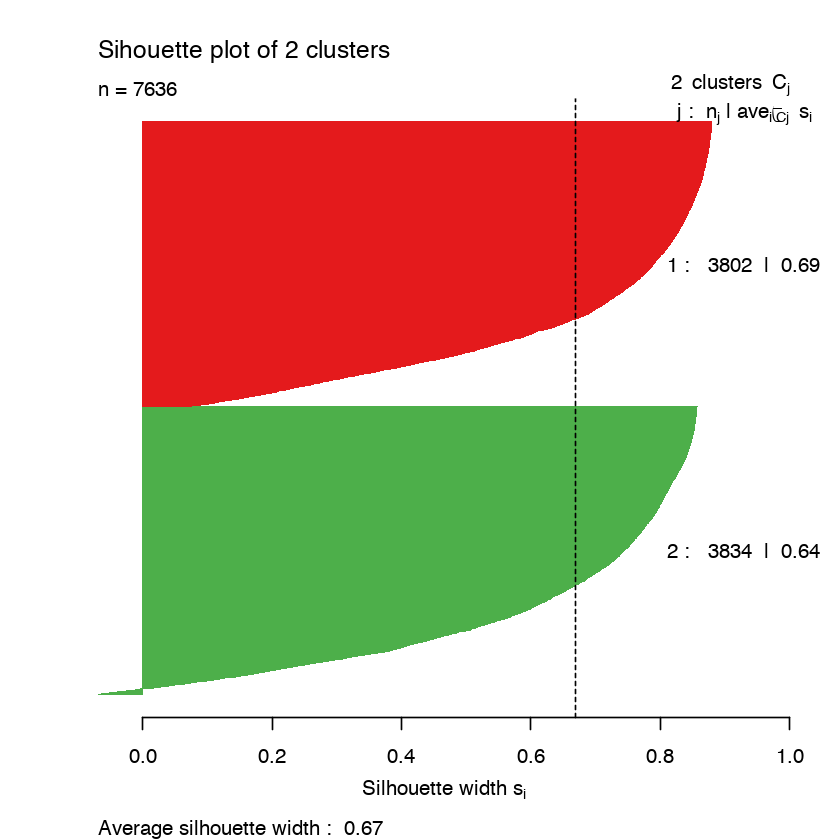

In [26]:
ncluster <- 2
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

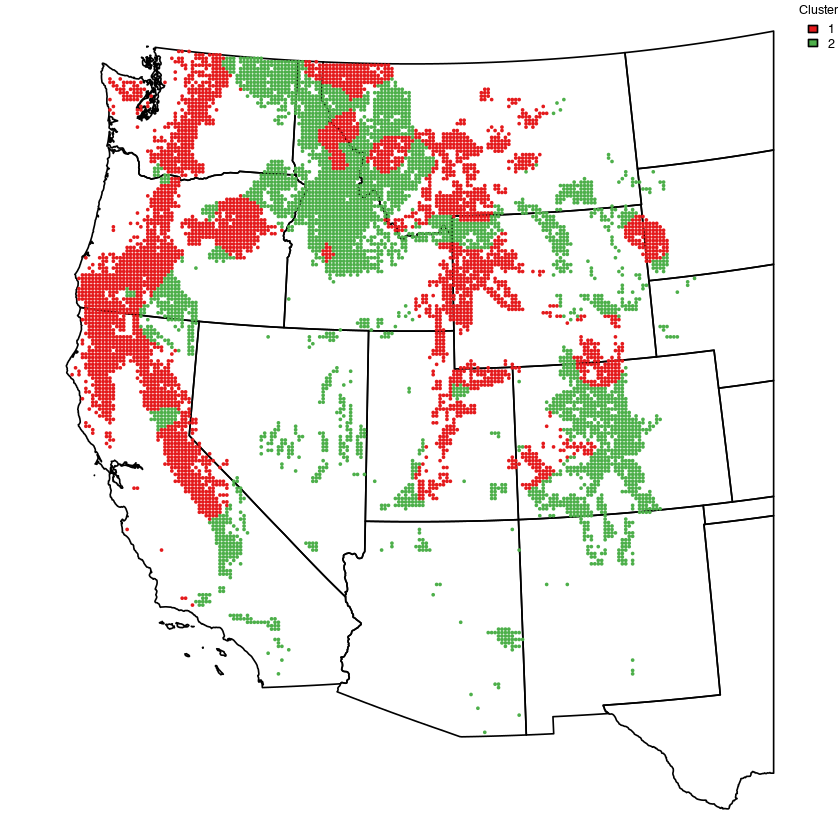

In [27]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend('topright', legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=0.6, bty="n")

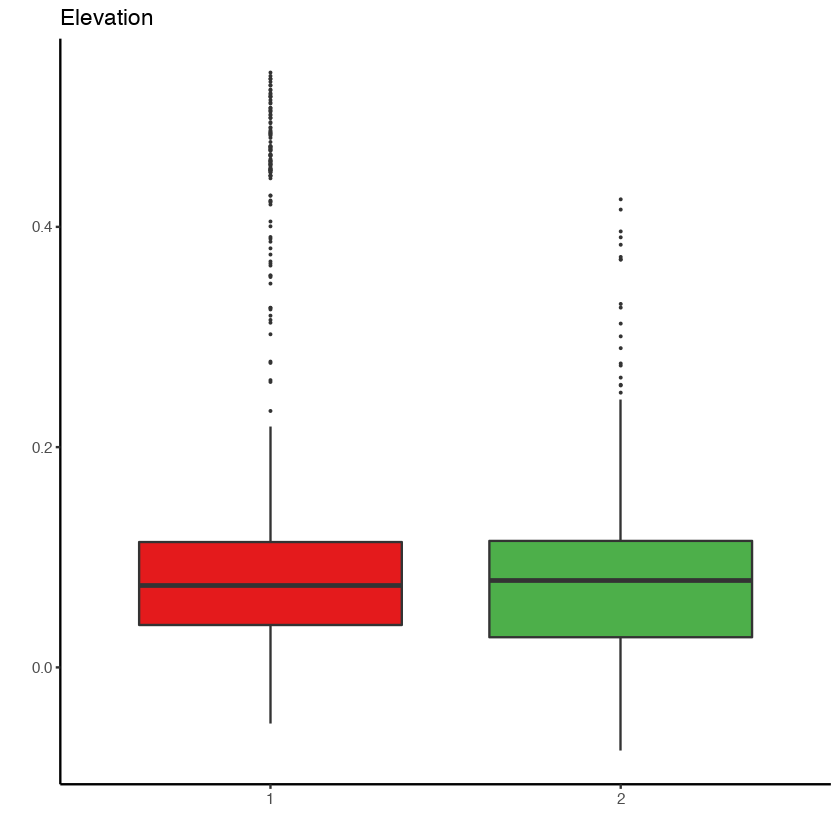

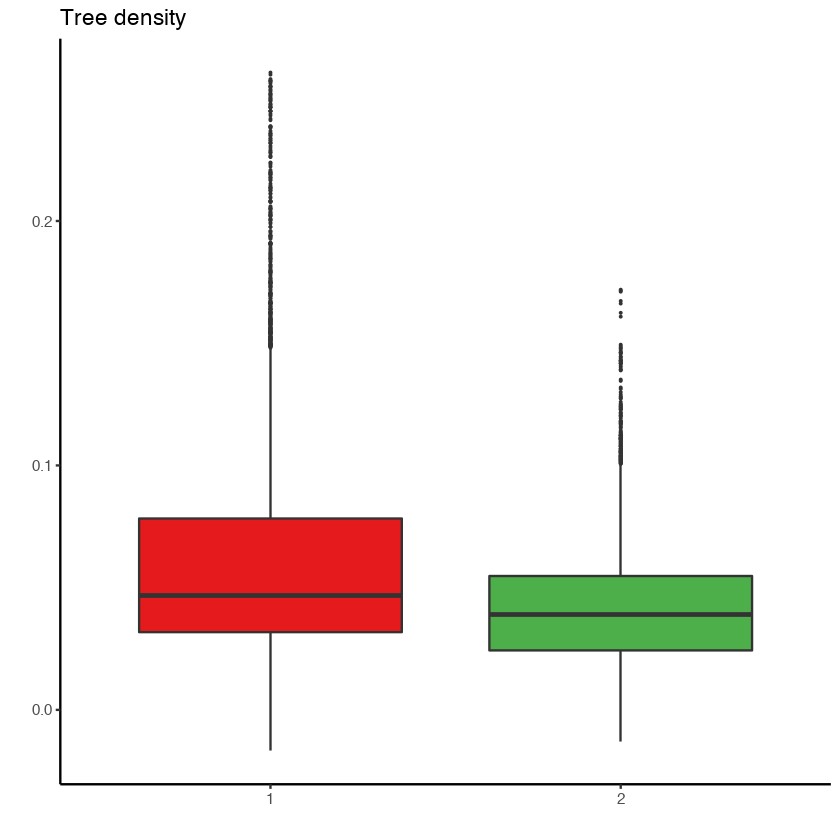

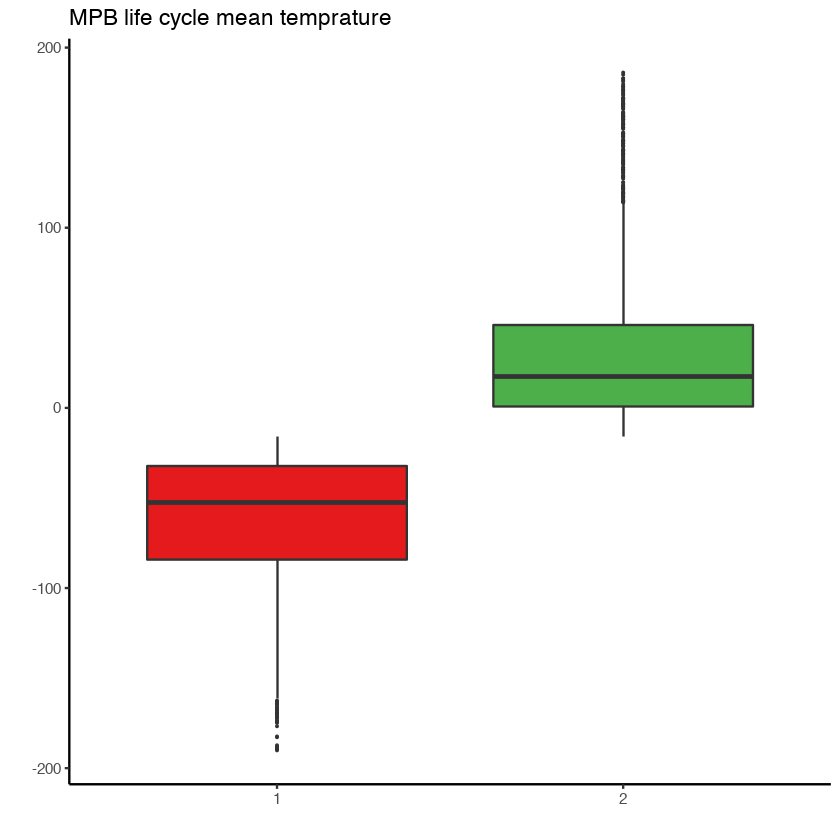

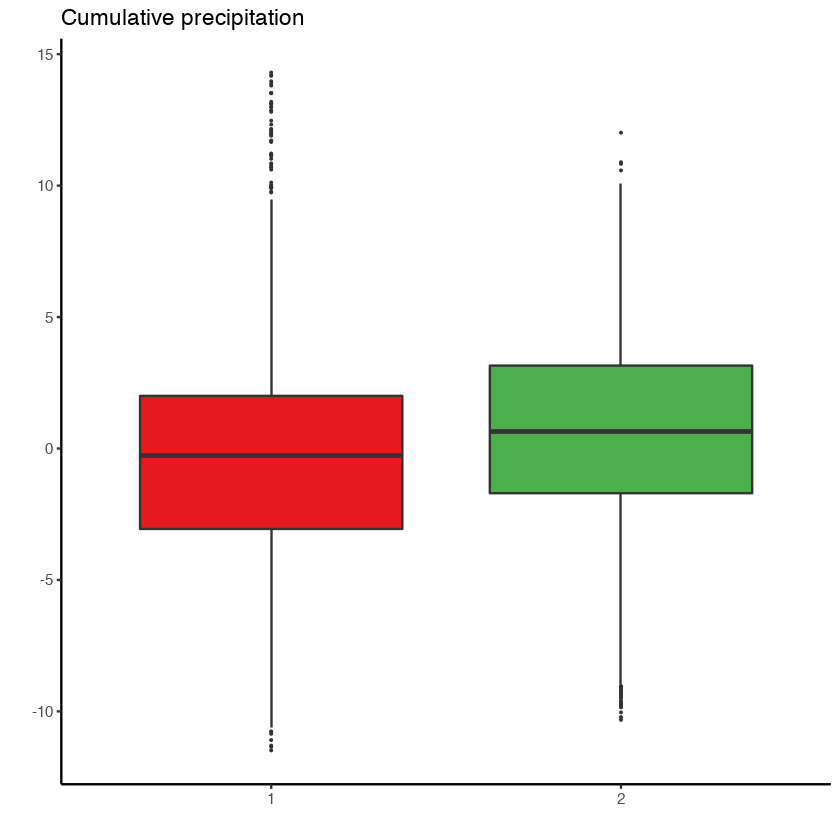

In [28]:
coeffs.updated <- data.frame(coeffs, fit$cluster)
par(mfrow=c(1, 1))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_classic() + theme(legend.position="none") 
    print(g)
}

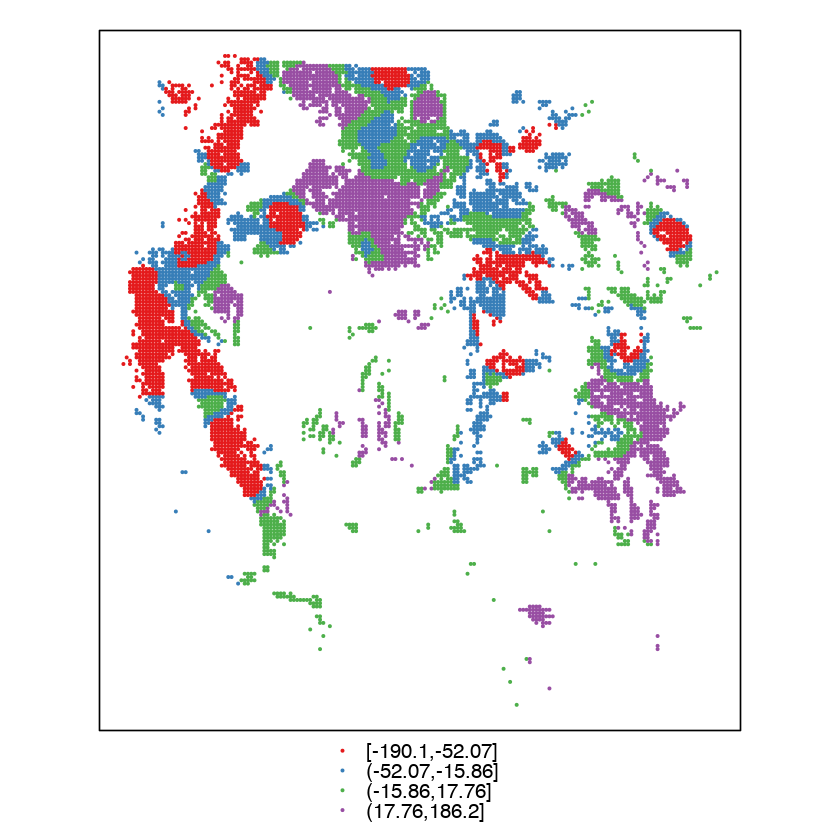

In [30]:
colours <- brewer.pal(4,"Set1")
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))
map.resids <- SpatialPointsDataFrame(data=data.frame(results[,'Tmean']), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(results[,'Tmean']), col.regions=colours, cex=0.3) 

In [31]:
vars <- selected

In [32]:
enp <- 2061.606 
for(v in vars){
    results[,paste0(v, '_t')] <- results[,v] / results[,paste0(v, '_se')]
    t <- results[,paste0(v, '_t')]
    pvals <- round(2 * (1 - pt(abs(t), enp)), 3)
    results[,paste0(v, '_p')] <- pvals
    results[,paste0(v, '_p_by')] <- round(p.adjust(pvals, "BY", n = ntests))
    results[,paste0(v, '_p_bh')] <- round(p.adjust(pvals, "BH", n = ntests))
    results[,paste0(v, '_p_bo')] <- round(p.adjust(pvals, "bonferroni", n = ntests))
    asf_pvals <- round(pvals * (1 + enp - (enp/ntests)), 3)
    asf_pvals[asf_pvals > 1] <- 1
    results[,paste0(v, '_p_fb')] <- asf_pvals
}

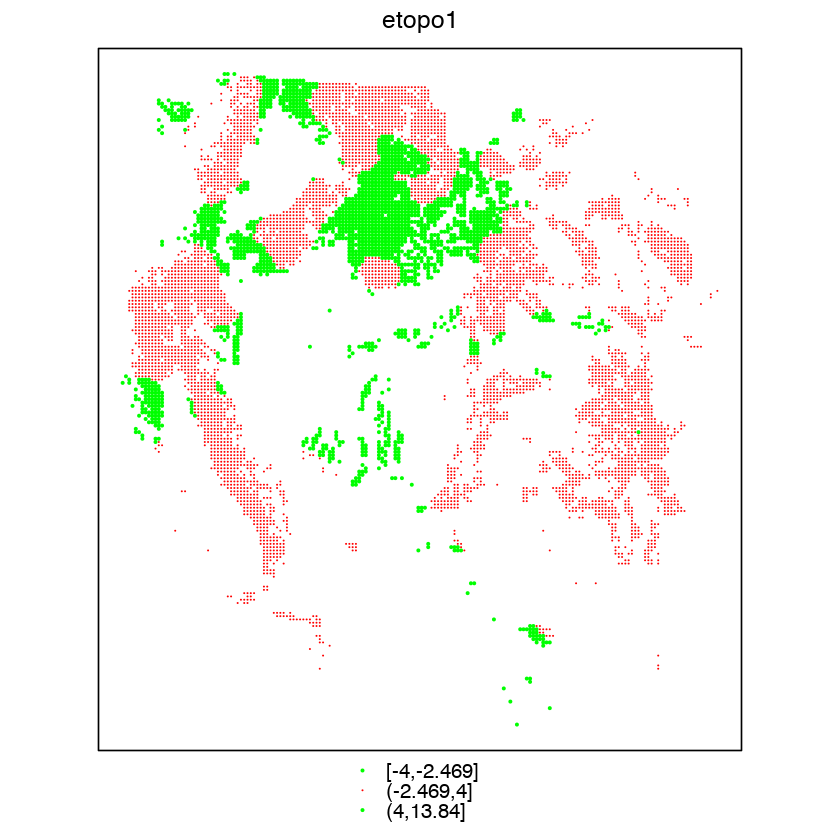

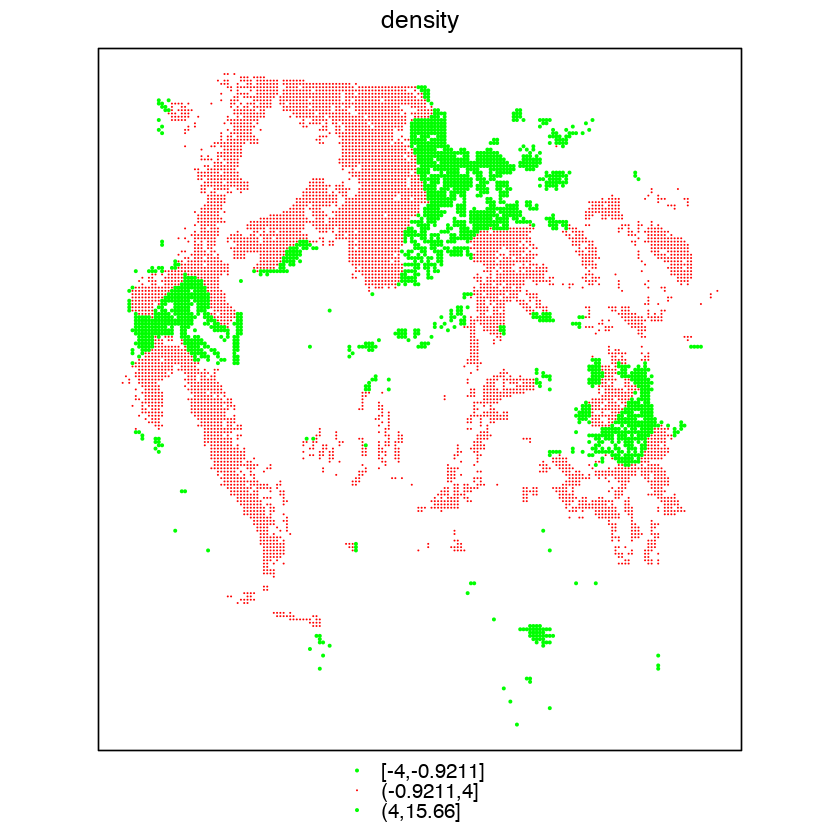

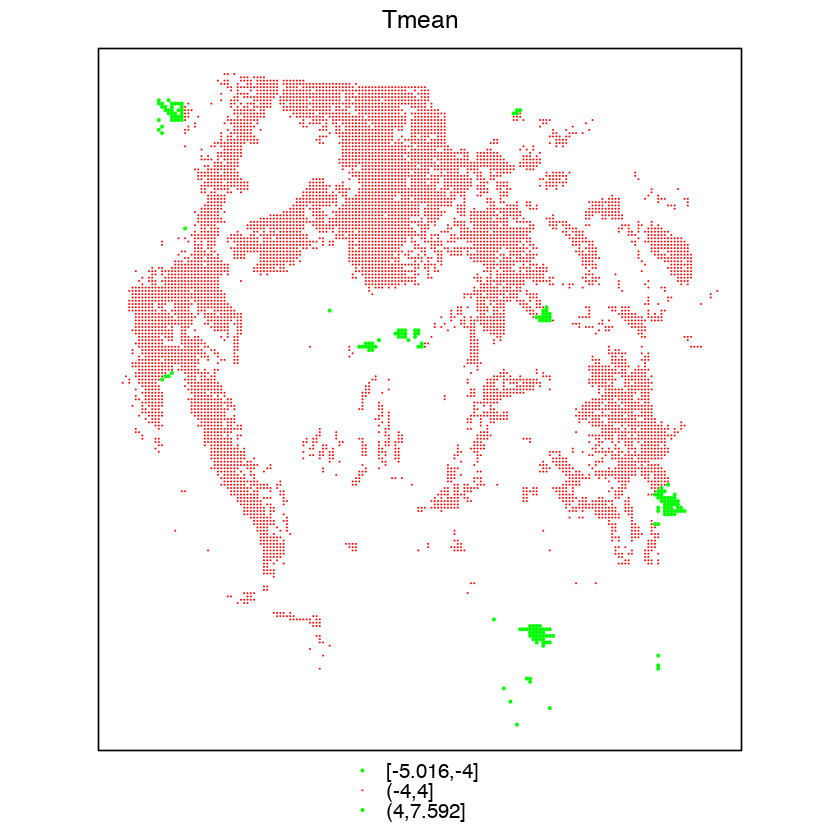

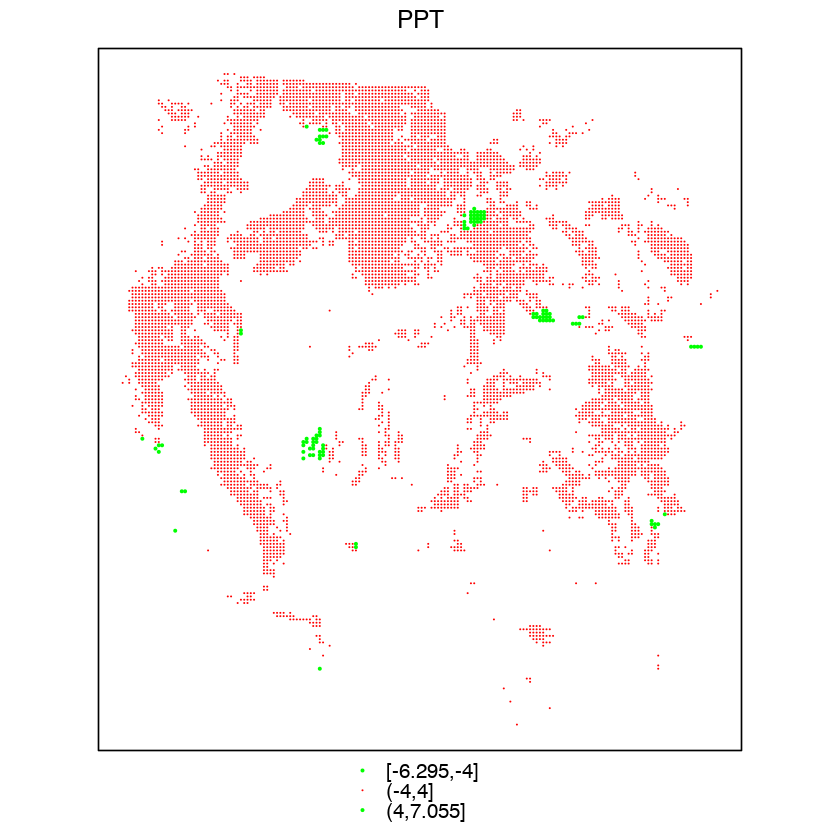

In [33]:
for(v in vars){
    t <- results[,paste0(v, '_t')]
    sig.map <- SpatialPointsDataFrame(data=data.frame(t), coords=cbind(xy$x,xy$y))
    colours <- c("green","red","green")
    breaks <- c(min(t),-4,4,max(t))
    print(spplot(sig.map, cuts=breaks, col.regions=colours, cex=c(0.3,0.1,0.3), main=v))
}

In [34]:
SDF <- SpatialPointsDataFrame(data=data.frame(results), coords=cbind(xy$x,xy$y))

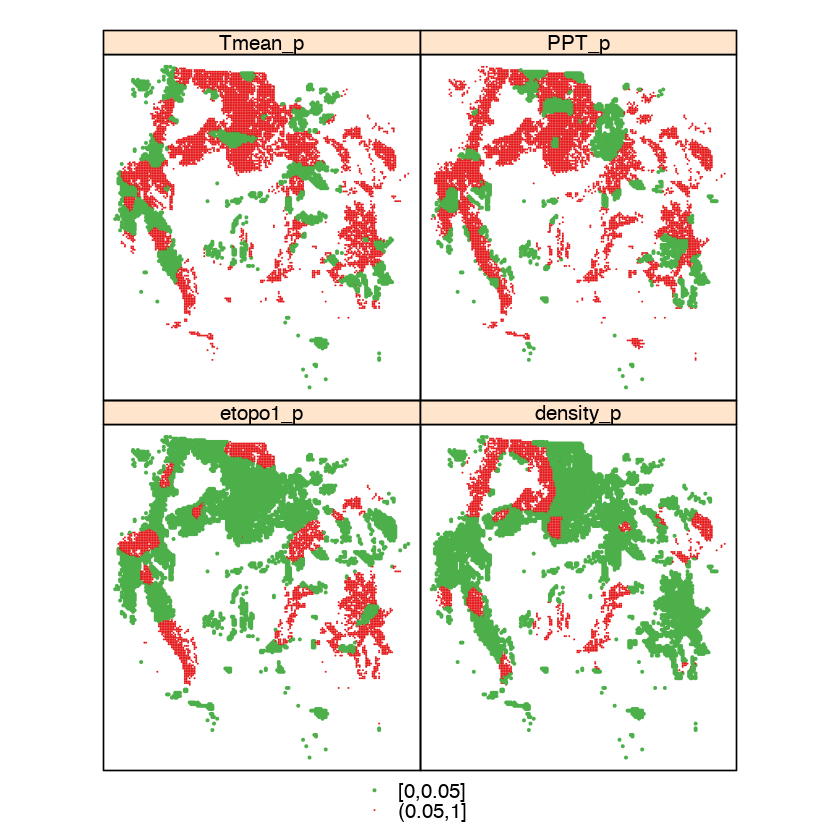

In [35]:
spplot(SDF, paste0(vars, '_p'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))

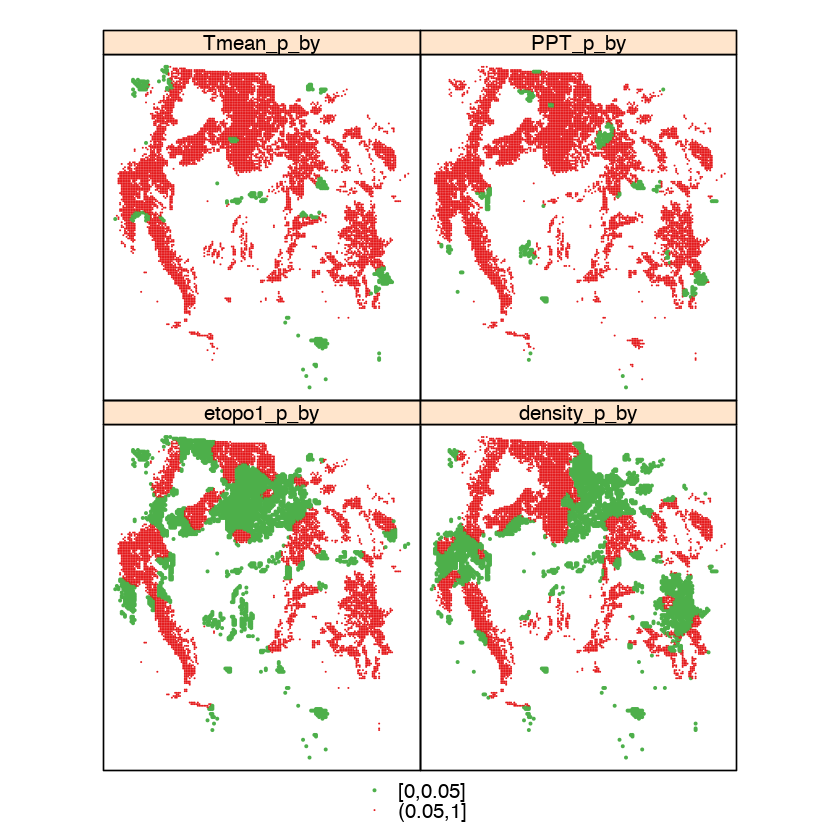

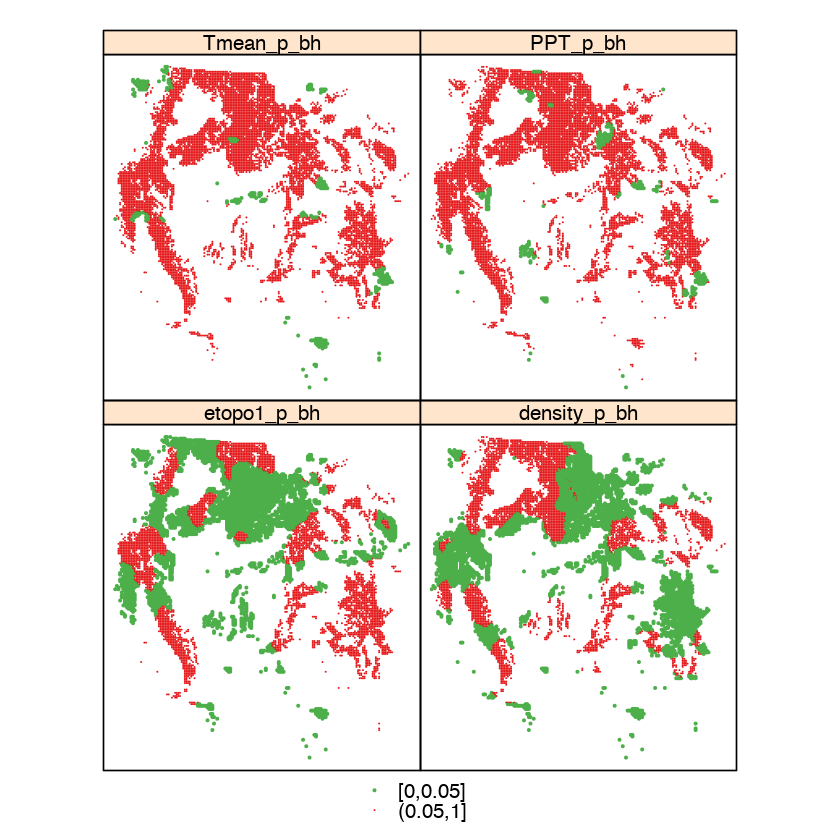

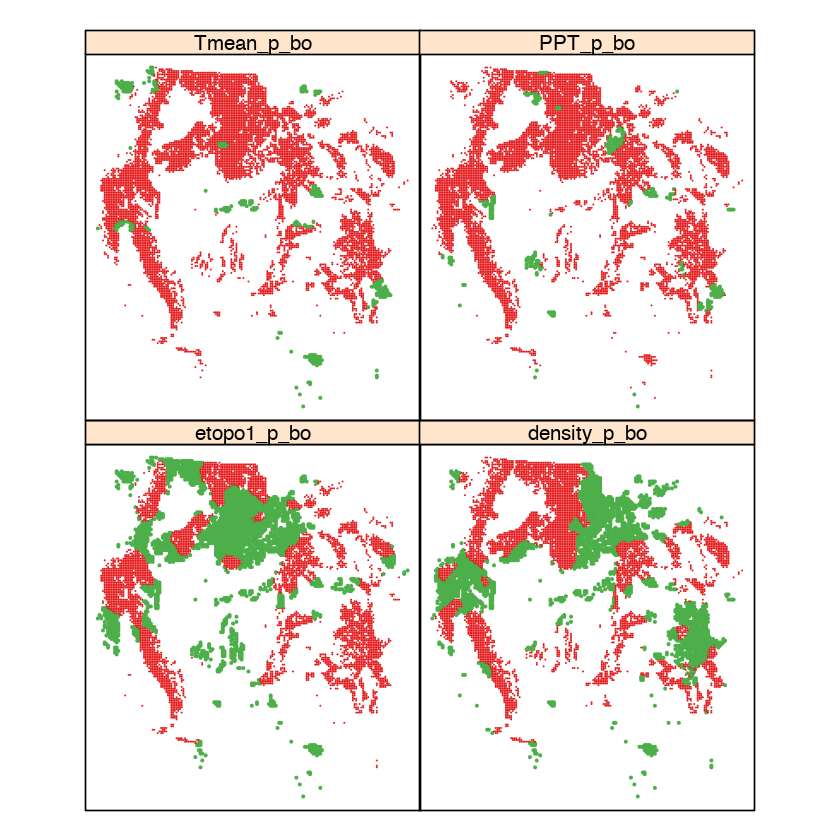

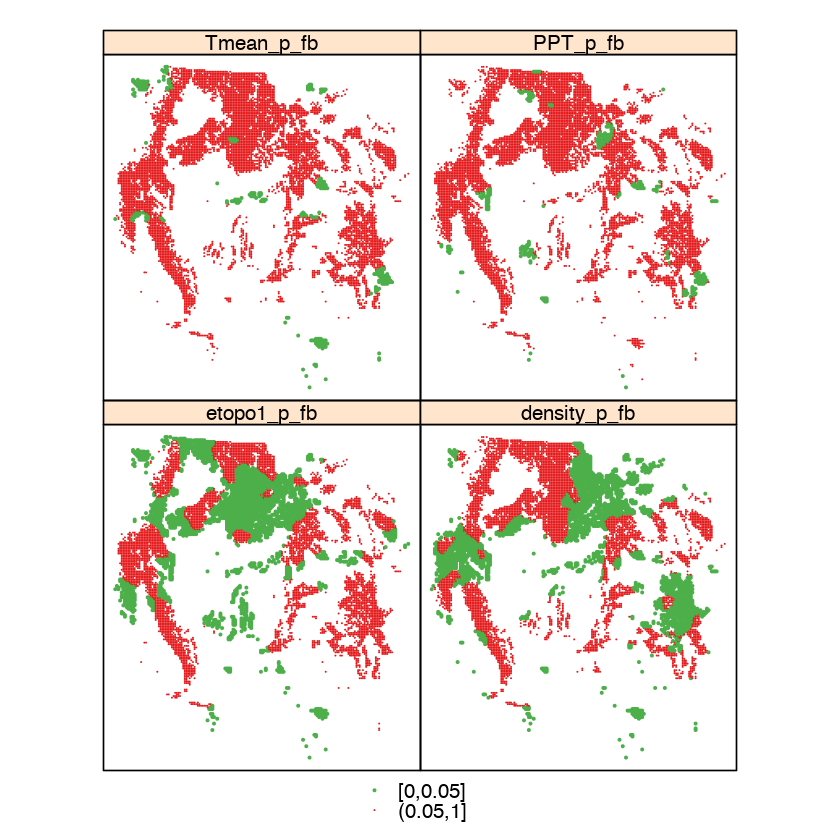

In [36]:
spplot(SDF, paste0(vars, '_p_by'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bh'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bo'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), 
       cex=c(0.3,0.1), auto.key=FALSE)
spplot(SDF, paste0(vars, '_p_fb'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))